In [1]:
# only for cuda enabled laptop and desktop

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [3]:
# TensorFlow and tf.keras

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
# Helper libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
train_labels[0]

9

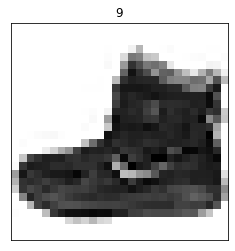

In [15]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

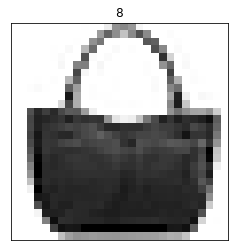

In [16]:
plt.imshow(train_images[100],cmap='gray_r')
plt.title(train_labels[100])
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
class_names[0]

'T-shirt/top'

In [20]:
test_labels[0]

9

In [21]:
class_names[test_labels[0]]

'Ankle boot'

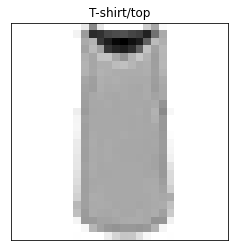

In [22]:
plt.imshow(train_images[2],cmap='gray_r')
plt.title(class_names[train_labels[2]])
plt.xticks([])
plt.yticks([])
plt.show()

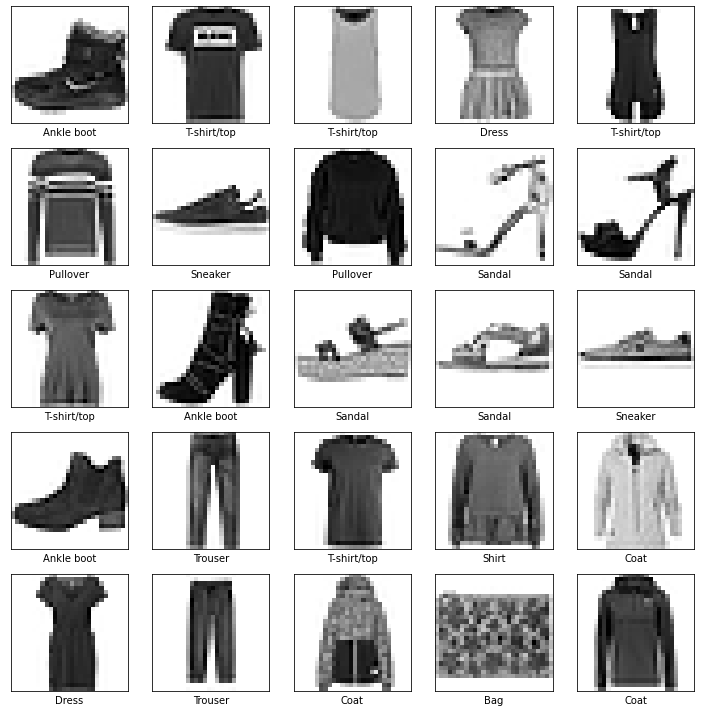

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [24]:
train_images = train_images / 255.0

In [25]:
test_images = test_images / 255.0

In [26]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels,validation_split=0.2, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4903 - accuracy: 0.8238 - val_loss: 0.3989 - val_accuracy: 0.8579
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8660 - val_loss: 0.3568 - val_accuracy: 0.8708
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3301 - accuracy: 0.8790 - val_loss: 0.3405 - val_accuracy: 0.8780
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3032 - accuracy: 0.8874 - val_loss: 0.3427 - val_accuracy: 0.8754
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2860 - accuracy: 0.8942 - val_loss: 0.3430 - val_accuracy: 0.8738
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2694 - accuracy: 0.9005 - val_loss: 0.3200 - val_accuracy: 0.8867
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9044 - val_loss: 0.3312 - val_accuracy:

In [31]:
history.history

{'loss': [0.49029844999313354,
  0.3677425682544708,
  0.3300666809082031,
  0.3031657338142395,
  0.2859671711921692,
  0.2693937122821808,
  0.25742170214653015,
  0.2444440722465515,
  0.2344147115945816,
  0.2239285111427307,
  0.21433955430984497,
  0.20668596029281616,
  0.1994834542274475,
  0.18992847204208374,
  0.1856784224510193,
  0.17748472094535828,
  0.17106610536575317,
  0.16693145036697388,
  0.1592044085264206,
  0.15407682955265045,
  0.15084734559059143,
  0.14730839431285858,
  0.1407671570777893,
  0.13644427061080933,
  0.1334553062915802,
  0.1306653469800949,
  0.12603887915611267,
  0.12443297356367111,
  0.12007183581590652,
  0.11520889401435852,
  0.11311700195074081,
  0.10948406159877777,
  0.10781314224004745,
  0.1053139716386795,
  0.10159645229578018,
  0.0992843359708786,
  0.10118331015110016,
  0.09313101321458817,
  0.09190646559000015,
  0.09320449829101562,
  0.08842766284942627,
  0.08681462705135345,
  0.08647329360246658,
  0.081040546298027

In [32]:
history.history['val_accuracy']

[0.8579166531562805,
 0.8707500100135803,
 0.878000020980835,
 0.8754166960716248,
 0.8738333582878113,
 0.8866666555404663,
 0.8828333616256714,
 0.8896666765213013,
 0.8922500014305115,
 0.8869166374206543,
 0.8852499723434448,
 0.8934999704360962,
 0.8920000195503235,
 0.8863333463668823,
 0.893833339214325,
 0.8914999961853027,
 0.8910833597183228,
 0.8894166946411133,
 0.893750011920929,
 0.887666642665863,
 0.8892499804496765,
 0.890583336353302,
 0.8952500224113464,
 0.8955000042915344,
 0.887416660785675,
 0.8946666717529297,
 0.890500009059906,
 0.8955000042915344,
 0.8972499966621399,
 0.8846666812896729,
 0.8946666717529297,
 0.8982499837875366,
 0.8957499861717224,
 0.8931666612625122,
 0.8969166874885559,
 0.8863333463668823,
 0.8883333206176758,
 0.8942499756813049,
 0.8911666870117188,
 0.8871666789054871,
 0.8911666870117188,
 0.8982499837875366,
 0.893833339214325,
 0.8855000138282776,
 0.8912500143051147,
 0.8985000252723694,
 0.8911666870117188,
 0.8914999961853027,


In [33]:
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

In [34]:
acc

[0.8237500190734863,
 0.8659583330154419,
 0.8790208101272583,
 0.8873958587646484,
 0.8942291736602783,
 0.9004999995231628,
 0.9043958187103271,
 0.9057708382606506,
 0.9120625257492065,
 0.9156041741371155,
 0.9206458330154419,
 0.9226041436195374,
 0.9261875152587891,
 0.9297083616256714,
 0.929604172706604,
 0.9331874847412109,
 0.9350416660308838,
 0.9366250038146973,
 0.9407708048820496,
 0.942062497138977,
 0.9426666498184204,
 0.9438750147819519,
 0.9472291469573975,
 0.9489374756813049,
 0.9492708444595337,
 0.9510208368301392,
 0.9527291655540466,
 0.9538958072662354,
 0.9550625085830688,
 0.9569166898727417,
 0.9566666483879089,
 0.9586041569709778,
 0.9598749876022339,
 0.9601041674613953,
 0.9614166617393494,
 0.9621250033378601,
 0.9622916579246521,
 0.9654791951179504,
 0.9650208353996277,
 0.9653333425521851,
 0.9667083621025085,
 0.9677083492279053,
 0.9674999713897705,
 0.9691874980926514,
 0.9672291874885559,
 0.9709791541099548,
 0.9708124995231628,
 0.970958352088

In [35]:
val_acc

[0.8579166531562805,
 0.8707500100135803,
 0.878000020980835,
 0.8754166960716248,
 0.8738333582878113,
 0.8866666555404663,
 0.8828333616256714,
 0.8896666765213013,
 0.8922500014305115,
 0.8869166374206543,
 0.8852499723434448,
 0.8934999704360962,
 0.8920000195503235,
 0.8863333463668823,
 0.893833339214325,
 0.8914999961853027,
 0.8910833597183228,
 0.8894166946411133,
 0.893750011920929,
 0.887666642665863,
 0.8892499804496765,
 0.890583336353302,
 0.8952500224113464,
 0.8955000042915344,
 0.887416660785675,
 0.8946666717529297,
 0.890500009059906,
 0.8955000042915344,
 0.8972499966621399,
 0.8846666812896729,
 0.8946666717529297,
 0.8982499837875366,
 0.8957499861717224,
 0.8931666612625122,
 0.8969166874885559,
 0.8863333463668823,
 0.8883333206176758,
 0.8942499756813049,
 0.8911666870117188,
 0.8871666789054871,
 0.8911666870117188,
 0.8982499837875366,
 0.893833339214325,
 0.8855000138282776,
 0.8912500143051147,
 0.8985000252723694,
 0.8911666870117188,
 0.8914999961853027,


In [36]:
val_loss

[0.39889079332351685,
 0.35684239864349365,
 0.34053245186805725,
 0.3426623046398163,
 0.3430025577545166,
 0.3200274109840393,
 0.33122119307518005,
 0.3146451711654663,
 0.3141431212425232,
 0.3267621695995331,
 0.34942367672920227,
 0.3096587359905243,
 0.3283497393131256,
 0.33713293075561523,
 0.325051486492157,
 0.3320142924785614,
 0.3480415940284729,
 0.3492014706134796,
 0.339386910200119,
 0.37611857056617737,
 0.3942514657974243,
 0.3820769190788269,
 0.3709757626056671,
 0.3760470747947693,
 0.41626712679862976,
 0.3608217239379883,
 0.42052286863327026,
 0.4109242260456085,
 0.3983616232872009,
 0.45257821679115295,
 0.42558902502059937,
 0.4041326940059662,
 0.4110991954803467,
 0.4266507029533386,
 0.4060135781764984,
 0.4727703332901001,
 0.4732142388820648,
 0.4554688334465027,
 0.4842629134654999,
 0.5155125856399536,
 0.4879268407821655,
 0.4673539102077484,
 0.44789811968803406,
 0.49842342734336853,
 0.5419256687164307,
 0.47825244069099426,
 0.5480782389640808,
 

In [37]:
loss

[0.49029844999313354,
 0.3677425682544708,
 0.3300666809082031,
 0.3031657338142395,
 0.2859671711921692,
 0.2693937122821808,
 0.25742170214653015,
 0.2444440722465515,
 0.2344147115945816,
 0.2239285111427307,
 0.21433955430984497,
 0.20668596029281616,
 0.1994834542274475,
 0.18992847204208374,
 0.1856784224510193,
 0.17748472094535828,
 0.17106610536575317,
 0.16693145036697388,
 0.1592044085264206,
 0.15407682955265045,
 0.15084734559059143,
 0.14730839431285858,
 0.1407671570777893,
 0.13644427061080933,
 0.1334553062915802,
 0.1306653469800949,
 0.12603887915611267,
 0.12443297356367111,
 0.12007183581590652,
 0.11520889401435852,
 0.11311700195074081,
 0.10948406159877777,
 0.10781314224004745,
 0.1053139716386795,
 0.10159645229578018,
 0.0992843359708786,
 0.10118331015110016,
 0.09313101321458817,
 0.09190646559000015,
 0.09320449829101562,
 0.08842766284942627,
 0.08681462705135345,
 0.08647329360246658,
 0.08104054629802704,
 0.08792676776647568,
 0.0782824456691742,
 0.07

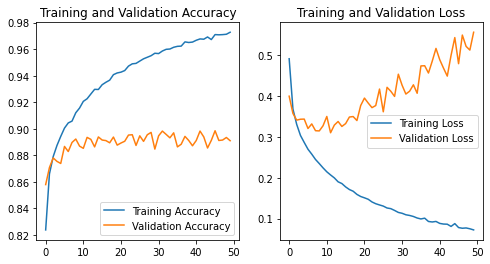

In [38]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()

In [39]:
# Early Stopping

In [40]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [41]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_new.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [43]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [44]:
history = model_new.fit(train_images, train_labels, epochs=50, validation_split=0.2,callbacks=callback)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4906 - accuracy: 0.8264 - val_loss: 0.4108 - val_accuracy: 0.8512
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3694 - accuracy: 0.8644 - val_loss: 0.3737 - val_accuracy: 0.8661
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3325 - accuracy: 0.8764 - val_loss: 0.3301 - val_accuracy: 0.8804
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3056 - accuracy: 0.8873 - val_loss: 0.3356 - val_accuracy: 0.8792
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2848 - accuracy: 0.8950 - val_loss: 0.3226 - val_accuracy: 0.8820
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2702 - accuracy: 0.9001 - val_loss: 0.3171 - val_accuracy: 0.8893
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2551 - accuracy: 0.9035 - val_loss: 0.3163 - val_accuracy:

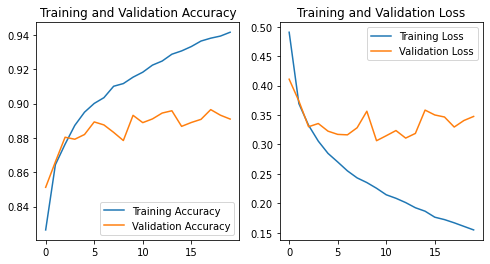

In [46]:
epochs = 20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()